# Kecerdasan Buatan

## Tugas 2: k-Nearest Neighbours & k-Means

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas2_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**NIM:**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan melihat penggunaan algoritma yang berbasis pada jarak antarobjek. Anda diberikan dataset berupa gambar angka-angka yang ditulis tangan. Dataset ini adalah versi yang lebih sederhana dari MNIST yang sering digunakan. Ukuran tiap gambar angka dalam dataset ini dalah 8x8 pixels. Deskripsi lengkapnya dapat Anda lihat di [sini](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Tugas Anda kali ini adalah menerapkan algoritma k-NN dan k-Means untuk melakukan prediksi dan pengelompokan 10 angka tersebut dan mengevaluasi hasilnya.

### Mengimpor Modul dan Dataset

In [1]:
from __future__ import print_function, division # Gunakan print(...) dan bukan print ...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

## 1. Eksplorasi Awal Data (10 poin)

Pada bagian ini, Anda diminta untuk mengeksplorasi data latih yang diberikan. Selalu gunakan data ini kecuali diberitahukan sebaliknya.

In [2]:
X, y = load_digits(return_X_y=True)

### Soal 1.1.a (2 poin)

Pisahkan dataset Anda menjadi `X_train`, `X_test`, `y_train`, dan `y_test` dengan `train_test_split()`. Pastikan bahwa data uji Anda terdiri dari 30% total data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Soal 1.1.b (2 poin)

Tunjukkan jumlah objek untuk masing-masing kelas dari `y_train` dan `y_test` dalam *bar plot*.

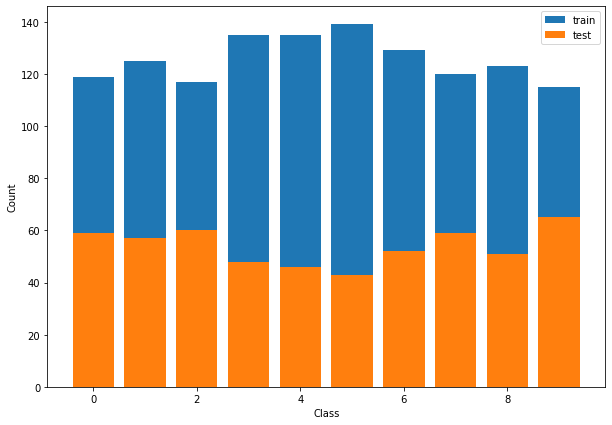

In [4]:
count_y = np.unique(y)
counts_train = np.unique(y_train, return_counts= True)
counts_test = np.unique(y_test, return_counts= True)

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(count_y, counts_train[1], label='train')
ax.bar(count_y, counts_test[1], label='test')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.legend()

### Soal 1.2 (3 poin)

Gambarkan histogram dari pixel ke-0 (pojok kiri atas) dan ke-4. Perbedaan apa yang dapat Anda lihat? Mengapa hasilnya seperti itu?

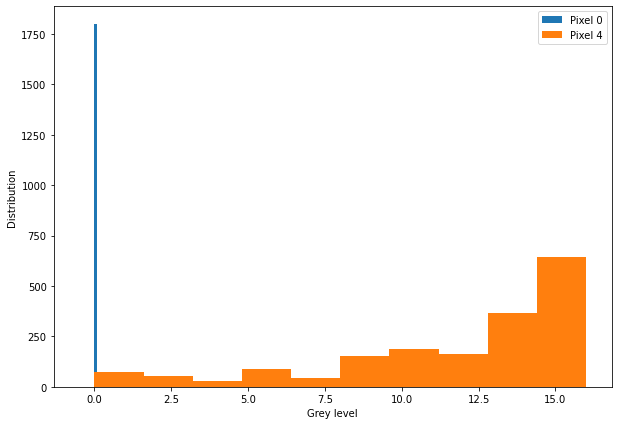

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(X[:,0],label='Pixel 0')
plt.hist(X[:,4],label='Pixel 4')
ax.set_xlabel('Grey level')
ax.set_ylabel('Distribution')
plt.legend()

Pixel ke 0 nilainya tidak variatif sebab hanya terdistribusi di satu grey level. Sedangkan pixel ke 4 lebih bervariatif.


### Soal 1.3 (3 poin)

Ambil 10 sampel gambar dari `X_train`, lalu tampilkan gambarnya.

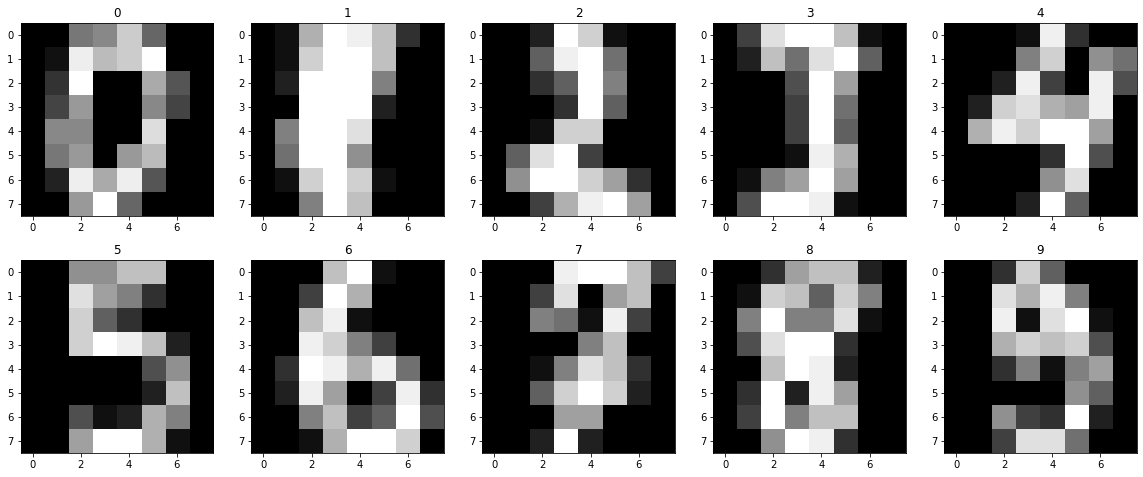

In [6]:
f, axes = plt.subplots(2, 5, figsize=(20,8))
axes = axes.reshape(-1)
for i, ax in zip (range(10), axes.flatten()):
    ax.imshow(X_train[y_train == i][i].reshape(8, 8), cmap='gist_gray')
    ax.set_title(i)
plt.show()

sumber : 
*   https://github.com/random-forests/tutorials/blob/master/ep7.ipynb

## 2. k-Nearest Neighbours (10 poin)

Anda akan melakukan klasifikasi digit tersebut dengan menggunakan algoritma k-NN.

### Soal 2.1.a (5 poin)

Dengan k-Nearest Neighbours, klasifikasikan data latih dengan menggunakan *cross-validation* (`cross_val_score()`) dan $k \in [1,10]$, lalu gambarkan *line plot* perubahan akurasi rata-ratanya! Jangan lupa untuk memberikan label pada sumbu-sumbunya!

Nilai akurasi  1 = 0.9856763422500474
Nilai akurasi  2 = 0.9816986024157339
Nilai akurasi  3 = 0.9840827167520395
Nilai akurasi  4 = 0.9793144880794283
Nilai akurasi  5 = 0.9801049769177259
Nilai akurasi  6 = 0.9801081388730791
Nilai akurasi  7 = 0.9793113261240751
Nilai akurasi  8 = 0.9753304243344084
Nilai akurasi  9 = 0.9753272623790552
Nilai akurasi  10 = 0.9721494972490989


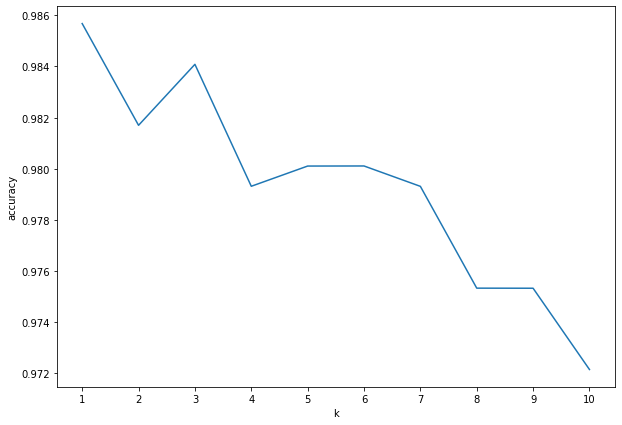

In [7]:
acc = []
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, scoring = 'accuracy')
  acc.append(scores.mean())
  print ('Nilai akurasi ', k,'=', scores.mean())

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(range(1,11), acc)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('accuracy');

sumber : https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

### Soal 2.1.b (2 poin)

Dari plot tersebut, berapa nilai $k$ yang akan Anda pilih? Mengapa?

Niali k yang akan dipilih adalah 3 sebab akurasinya paling tinggi dibandingkan yang lain, jika memilih k = 1 maka setiap data merupakan satu kelas tersendiri dan dapat menimbulkan overfitting

### Soal 2.1.c (3 poin)

Dari nilai $k$ yang Anda pilih, buatlah *heatmap* dari *confusion matrix* yang diperoleh dari klasifikasi data ujinya! Jangan lupa untuk memberikan label untuk masing-masing sumbunya dan menganotasi tiap kotak pada *heatmap*. Sertakan juga nilai akurasinya.

Accuracy:  0.9888888888888889


Text(157.74, 0.5, 'true label')

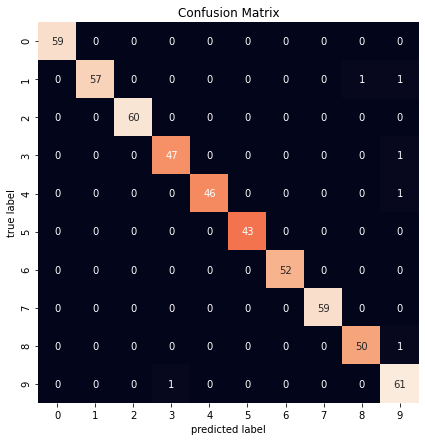

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
ax.set_title('Confusion Matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')

sumber : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

### Soal 2.2 (2 poin)

Mengapa k-NN disebut sebagai algoritma klasifikasi non-parametrik? Apa yang membedakannya dengan algoritma klasifikasi parametrik?

Karena dengan menggunakan kNN data yang digunakan tidak perlu diketahui bentuk distribusinya. Sedangkan untuk algoritma klasifikasi parametrik perlu diketahui jenis distribusi data yang akan diolah.

## 3. k-NN Regression (10 poin)

Terkadang, gambar yang kita miliki mengalami kerusakan. Salah satu cara untuk memperbaikinya adalah dengan memprediksi pixel yang rusak tersebut dengan pixels yang kita miliki. Untuk memahami kasus ini lebih baik, Anda dapat melihat contohnya di [sini](http://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html).

### Soal 3.1 (2 poin)

Anggap saja pixel ke-42 mengalami kerusakan sehingga akan Anda prediksi. Oleh karena itu, Anda akan mencoba melakukan regresi dengan mengambil pixel di kiri dan di atas dari pixel ke-42, i.e. pixel ke-41 dan ke-34. Buatlah data latih dan data uji baru dengan menggunakan ide ini.

In [9]:
train = X_train
test = X_test

In [10]:
sample = []
for atas, kiri in zip(train[:,34], train[:,41]):
  sample.append([atas, kiri])

Xtrain = sample

sample = []
for atas, kiri in zip(test[:,34], test[:,41]):
  sample.append([atas, kiri])

Xtest = sample

In [11]:
ytrain = train[:,42]
ytest = test[:,42]

In [12]:
knn_r = KNeighborsRegressor()
knn_r.fit(Xtrain, ytrain)
pred = knn_r.predict(Xtest)

In [17]:
new_images = []
for img in test:
  new_images.append(img)

new_images = np.array(new_images)

In [22]:
for i in range(len(new_images)):
  new_images[i][42] = pred[i]

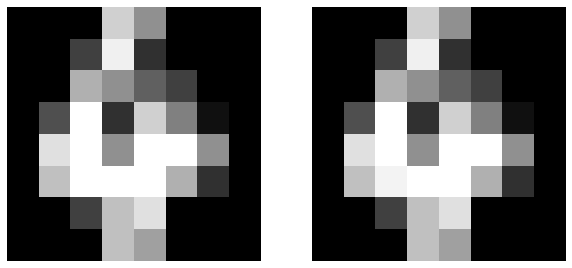

In [23]:
fig, ax = plt.subplots(ncols= 2, figsize=(10,7))
ax[0].axis("off")
ax[1].axis("off")
ax[0].imshow(test[5].reshape(8,8),cmap=plt.cm.gray, interpolation="nearest")
ax[1].imshow(new_images[5].reshape(8,8),cmap=plt.cm.gray, interpolation="nearest")

### Soal 3.2 (5 poin)

Lakukan *cross-validation* pada data latih untuk regresi dengan k-NN guna memprediksi nilai pixel ke-42 untuk $k \in [1,10]$ lalu laporkan RMSE-nya dalam bentuk *line plot*. Apa yang dapat Anda amati?

Nilai rmse  1 = -0.9881481481481481
Nilai rmse  2 = -1.0308148148148149
Nilai rmse  3 = -1.1943868312757202
Nilai rmse  4 = -1.377263888888889
Nilai rmse  5 = -1.4507614814814815
Nilai rmse  6 = -1.5342366255144033
Nilai rmse  7 = -1.6678367346938778
Nilai rmse  8 = -1.834486111111111
Nilai rmse  9 = -2.046431641518061
Nilai rmse  10 = -2.309344444444444


([<matplotlib.axis.XTick at 0x7f6ebf35c310>,
 <a list of 10 Text major ticklabel objects>)

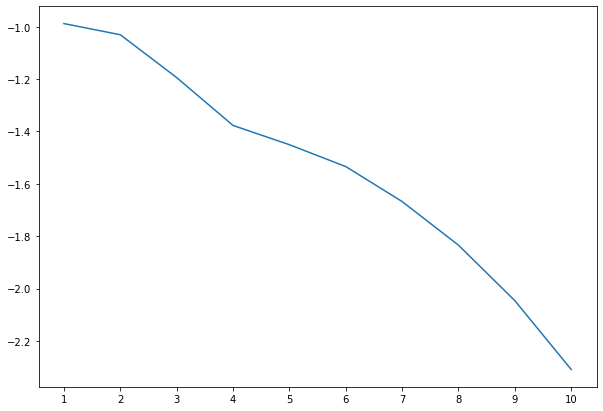

In [ ]:
rmse = []
for k in range(1,11):
    knn_r = KNeighborsRegressor(n_neighbors=k)
    knn_r.fit(Xtrain, ytrain)
    score = cross_val_score(knn_r, Xtest, ytest, scoring='neg_mean_squared_error')
    rmse.append(score.mean())
    print ('Nilai rmse ', k,'=', score.mean())

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(range(1,11), rmse)
plt.xticks(range(1,11))

Semakin banyak jumlah kelasnya, akan semakin besar errornya

### Soal 3.3 (3 poin)

Pilih dua nilai $k$ terbaik. Lalu coba lakukan regresi pada data uji yang telah dibuat. Apa pendapat Anda terhadap hasil yang Anda dapatkan ini?

In [24]:
knn_r = KNeighborsRegressor(n_neighbors=2)
knn_r.fit(Xtrain, ytrain)
pred = knn_r.predict(Xtest)

In [25]:
new_images = []
for img in test:
  new_images.append(img)

new_images = np.array(new_images)

In [26]:
for i in range(len(new_images)):
  new_images[i][42] = pred[i]

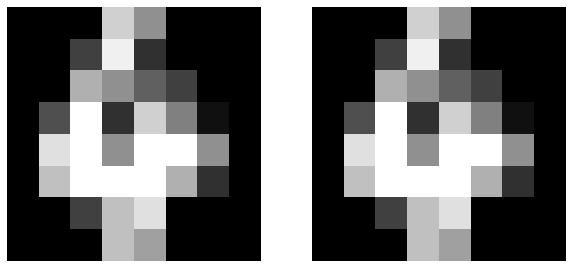

In [27]:
fig, ax = plt.subplots(ncols= 2, figsize=(10,7))
ax[0].axis("off")
ax[1].axis("off")
ax[0].imshow(test[5].reshape(8,8),cmap=plt.cm.gray, interpolation="nearest")
ax[1].imshow(new_images[5].reshape(8,8),cmap=plt.cm.gray, interpolation="nearest")

*Jawaban Anda di sini*

## 4. k-Means (20 poin)

### Soal 4.1.a (2 poin)

Gunakan `KMeans` untuk melakukan *clustering* dengan $k=10$.

In [32]:
kmeans = KMeans(init='k-means++', n_clusters=10)
kmeans.fit(X, y)
pred = kmeans.predict(X)

### Soal 4.1.b (4 poin)

Dari hasil *clustering* yang telah Anda lakukan, coba gambarkan *centroids*-nya dari atribut `cluster_centers_` yang dihasilkan dari objek `KMeans` menggunakan `imshow()`. Ubah ukuran dimensi tiap *centroid* menjadi 8x8. Apa yang dapat Anda amati?

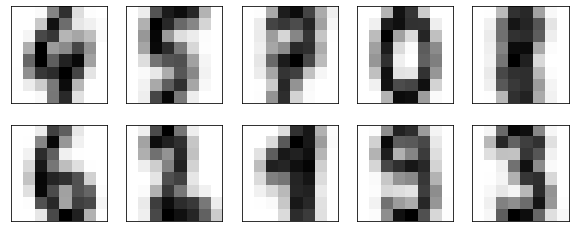

In [36]:
f, ax = plt.subplots(2, 5, figsize=(10, 4))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**Jawab:**

Setiap titik pusat kluster merupakan angka yang berbeda, artinya model kmeans sudah dapat membedakan antara satu angka dengan angka lainnya.

sumber : 

*   https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb



### Soal 4.2 (4 poin)

Lakukan kembali *clustering* dengan `KMeans`, tapi kali ini gunakan nilai $k \in [5,15]$. Laporkan nilai inertia dari proses *clustering* dalam *scree plot*. Mengapa *scree plot*-nya seperti itu?

Nilai inersia  5 = 1498982.9278431516
Nilai inersia  6 = 1404961.0163420653
Nilai inersia  7 = 1334769.7632234555
Nilai inersia  8 = 1264971.1246971749
Nilai inersia  9 = 1202331.5123839853
Nilai inersia  10 = 1165109.4601956704
Nilai inersia  11 = 1132858.718426911
Nilai inersia  12 = 1099077.9963981167
Nilai inersia  13 = 1070435.250763277
Nilai inersia  14 = 1043916.9971232263
Nilai inersia  15 = 1019068.2418406616


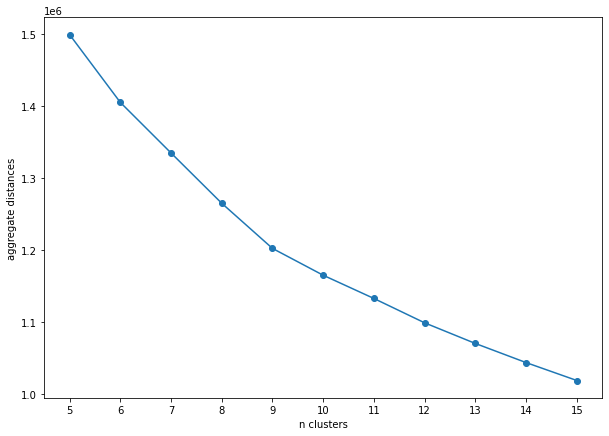

In [41]:
dis = []
for i in range(5,16):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  dis.append(kmeans.inertia_)
  print('Nilai inersia ', i,'=', kmeans.inertia_)

f, ax = plt.subplots(figsize=(10, 7))
plt.plot(range(5,16), dis, 'o-')
plt.xticks(range(5,16))
plt.xlabel('n clusters')
plt.ylabel('aggregate distances')
plt.show()

Jawab:

Scree plot tersebut menggambarkan nilai kedekatan anatara titik pusat dengan data pada klaster tersebut. Semakin besar nilai k nya semakin kecil jarak antar datanya.

### Soal 4.3.a (4 poin)

Coba lakukan klasifikasi dengan memanfaatkan algoritma k-Means. Perhatikan bahwa saat akan membandingkan label, Anda harus melakukan *class assignment* untuk tiap klaster secara *greedy*. Laporkan akurasi yang dihasilkan dengan metode ini.

In [55]:
kmeans = KMeans(n_clusters=9)
pred = kmeans.fit_predict(X)

labels = np.zeros_like(clusters)
for i in range(9):
  mask = (clusters == i)
  labels[mask] = y[mask][0]

In [56]:
accuracy_score(y, labels)

0.4774624373956594

### Soal 4.3.b (2 poin)

Gambarkan *heatmap* dari *confusion matrix* yang dihasilkan dari klasifikasi di atas. Jangan lupa untuk memberikan label yang sesuai untuk tiap sumbunya.

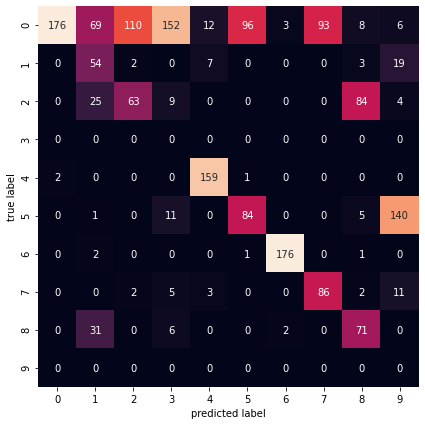

In [53]:
f, ax = plt.subplots(figsize=(10, 7))
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');

### Soal 4.4 (4 poin)

Berikan kesimpulan dari eksplorasi yang telah Anda lakukan dalam keseluruhan tugas ini.

Kesimpulan

1. Atribut dari sebuah gambar adalah pixelnya.
2. Sebuah pixell bertetangga dengan pixel lainnya
3. k-NN dan k-Means keduanya sama sama melakukan pengelompokan terhadap data dengan menggunakan jarak terdekat antara data dengan titik pusat
4. k-NN membutuhkan label dan k-Means tidak



